In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def wavepacket(g=np.array([.1,.1,.1,.1,.1]), omega=-1.0, x=range(10), t=0, k_max=10, psi_x=None):
    if psi_x == None:
        psi_x = np.zeros(len(x), dtype=complex)
        
    nk = k_max/len(g)
    for gk_idx, gk in enumerate(g):
        k = -k_max + 2*gk_idx/k_max
        for x_idx, xi in enumerate(x):
            psi_x[x_idx] += gk * np.exp(1j*k*xi - 1j*omega*t)
    return psi_x/(2*np.pi) 

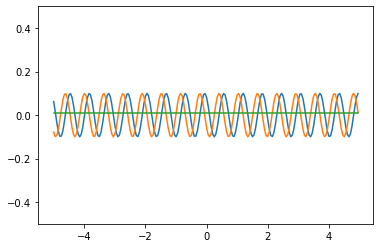

In [57]:
from IPython import display
import time

# %matplotlib notebook

x_min = -5
x_max = 5
tstep = .5
max_freq = 40
nsteps = 20
nfreqs = 1
x = np.array(range(x_min*nsteps, x_max*nsteps))/nsteps



for ti in range(50):
    y = wavepacket(g=np.ones(nfreqs), x=x ,t=ti*tstep, omega=-1)
    norm = np.sqrt(np.real(y.conj().dot(y * np.abs(x_min-x_max)/nsteps)))
    y = y / norm

    plt.plot(x,np.real(y))
    plt.plot(x,np.imag(y))
    plt.plot(x,np.real(y.conj()*y))
    axes = plt.gca()
#     axes.set_xlim([-10,10])
    axes.set_ylim([-.5,.5])
    plt.show()
    display.clear_output(wait=True)
#     time.sleep(1.0)

